In [94]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
 


In [95]:
 
################# Parameters #####################
 
path = "train" # folder with all the class folders
labelFile = 'Labels.csv' # file with all names of classes
batch_size_val=50  # how many to process together
steps_per_epoch_val=2000
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    # if 1000 images split will 200 for testing
validationRatio = 0.2 # if 1000 images 20% of remaining 800 will be 160 for validation
###################################################
 

In [96]:

 
############################### Importing of the Images
count = 0
images = []
classNo = []
myList = os.listdir(path)

if '.DS_Store' in myList:
    myList.remove('.DS_Store')
print("Total Classes Detected:",len(myList))

noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg = cv2.resize(curImg, (imageDimesions[0],imageDimesions[1]))
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)


 


Total Classes Detected: 58
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57  


In [97]:
############################### Split Data
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)
 
# X_train = ARRAY OF IMAGES TO TRAIN
# y_train = CORRESPONDING CLASS ID
 
############################### TO CHECK IF NUMBER OF IMAGES MATCHES TO NUMBER OF LABELS FOR EACH DATA SET
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimesions))," The dimesionas of the Test images are wrong"


Data Shapes
Train(2668, 32, 32, 3) (2668,)
Validation(668, 32, 32, 3) (668,)
Test(834, 32, 32, 3) (834,)


data shape  (58, 2) <class 'pandas.core.frame.DataFrame'>


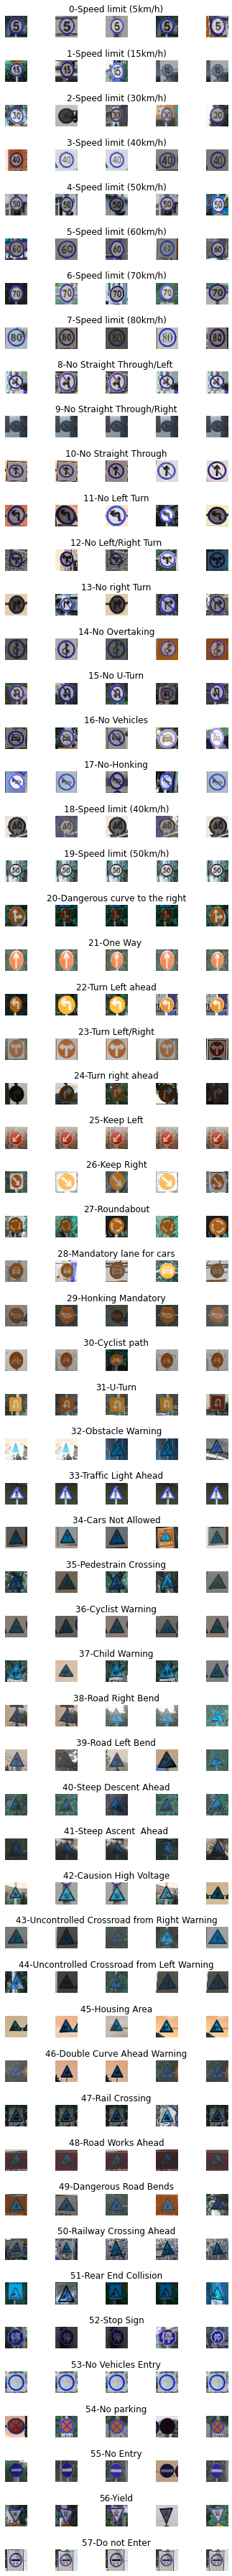

In [98]:
############################### READ CSV FILE
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))
 
############################### DISPLAY SOME SAMPLES IMAGES  OF ALL THE CLASSES
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[73, 20, 52, 171, 61, 118, 50, 99, 2, 2, 44, 85, 55, 26, 80, 17, 87, 85, 8, 2, 10, 6, 12, 6, 64, 2, 84, 19, 280, 27, 94, 29, 10, 2, 16, 108, 33, 35, 20, 20, 25, 8, 21, 52, 19, 13, 14, 9, 8, 30, 36, 6, 29, 1, 212, 100, 67, 4]


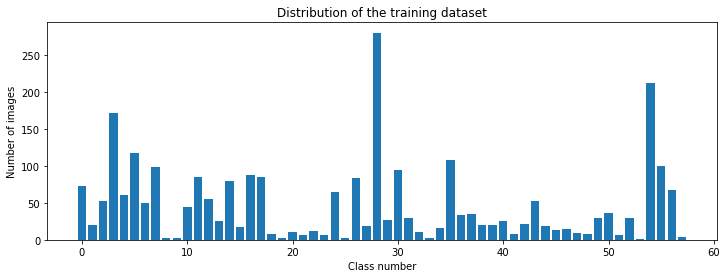

In [99]:
############################## DISPLAY A BAR CHART SHOWING NO OF SAMPLES FOR EACH CATEGORY
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 

In [100]:

############################### PREPROCESSING THE IMAGES
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     # CONVERT TO GRAYSCALE
    img = equalize(img)      # STANDARDIZE THE LIGHTING IN AN IMAGE
    img = img/255            # TO NORMALIZE VALUES BETWEEN 0 AND 1 INSTEAD OF 0 TO 255
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  # TO IRETATE AND PREPROCESS ALL IMAGES
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
# cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) # TO CHECK IF THE TRAINING IS DONE PROPERLY
 

In [101]:
############################### ADD A DEPTH OF 1
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
 
 

In [102]:

############################### AUGMENTATAION OF IMAGES: TO MAKEIT MORE GENERIC
dataGen= ImageDataGenerator(width_shift_range=0.1,   # 0.1 = 10%     IF MORE THAN 1 E.G 10 THEN IT REFFERS TO NO. OF  PIXELS EG 10 PIXELS
                            height_shift_range=0.1,
                            zoom_range=0.2,  # 0.2 MEANS CAN GO FROM 0.8 TO 1.2
                            shear_range=0.1,  # MAGNITUDE OF SHEAR ANGLE
                            rotation_range=10)  # DEGREES
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch,y_batch = next(batches)


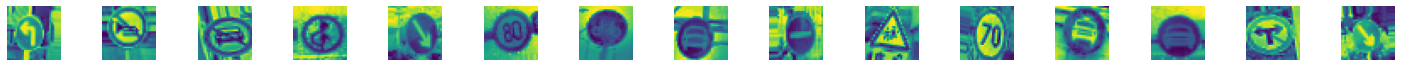

In [103]:
# TO SHOW AUGMENTED IMAGE SAMPLES
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()

In [104]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [105]:
print(X_train.shape,X_validation.shape)

(2668, 32, 32, 1) (668, 32, 32, 1)


In [131]:
############################### CONVOLUTION NEURAL NETWORK MODEL
import keras
from keras.models import Sequential,Model
from tensorflow.python.keras.models import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

#  enhanced CNN

def myModel():
    # no_Of_Filters=60
    # size_of_Filter=(5,5) # THIS IS THE KERNEL THAT MOVE AROUND THE IMAGE TO GET THE FEATURES.
    #                      # THIS WOULD REMOVE 2 PIXELS FROM EACH BORDER WHEN USING 32 32 IMAGE
    # size_of_Filter2=(3,3)
    # size_of_pool=(2,2)  # SCALE DOWN ALL FEATURE MAP TO GERNALIZE MORE, TO REDUCE OVERFITTING
    # no_Of_Nodes = 500   # NO. OF NODES IN HIDDEN LAYERS
    # model= Sequential()
    # model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    # model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    # model.add(MaxPooling2D(pool_size=size_of_pool)) # DOES NOT EFFECT THE DEPTH/NO OF FILTERS
 
    # model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    # model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    # model.add(MaxPooling2D(pool_size=size_of_pool))
    # model.add(Dropout(0.5))
 
    # model.add(Flatten())
    # model.add(Dense(no_Of_Nodes,activation='relu'))
    # model.add(Dropout(0.5)) # INPUTS NODES TO DROP WITH EACH UPDATE 1 ALL 0 NONE
    # model.add(Dense(noOfClasses,activation='softmax')) # OUTPUT LAYER
    # # COMPILE MODEL
    # model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

    model = Sequential()

    # stack stack of Conv2D and MaxPooling2D layer
    model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(imageDimesions[0],imageDimesions[1],1),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same'))

    model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))                  
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Flatten())
    model.add(Dense(128, activation='linear'))
    model.add(LeakyReLU(alpha=0.1))                
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    return model

# ############################### TRAIN
model = myModel()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=int(2668/batch_size_val),epochs=0,validation_data=(X_validation,y_validation),validation_steps=int(668/batch_size_val),shuffle=1)
 
print(X_train.shape,X_test.shape,X_validation.shape,)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

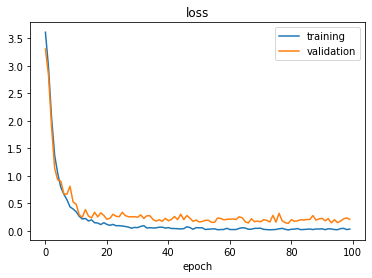

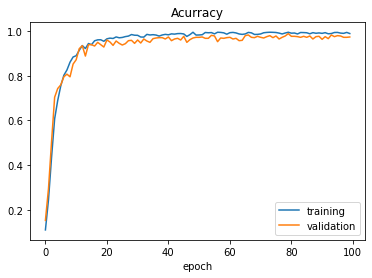

Test Score: 0.22929050028324127
Test Accuracy: 0.973621129989624


INFO:tensorflow:Assets written to: ram://edd9206a-7d9d-4053-8db2-aab823c50854/assets


INFO:tensorflow:Assets written to: ram://edd9206a-7d9d-4053-8db2-aab823c50854/assets


In [132]:
############################### PLOT
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
 
# STORE THE MODEL AS A PICKLE OBJECT
pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
pickle.dump(model,pickle_out)
pickle_out.close()

In [133]:

from pickletools import float8


test_path = os.listdir('test')
test_images = []

for y in test_path:
    curImg = cv2.imread('test'+"/"+y)
    curImg = cv2.cvtColor(curImg,cv2.COLOR_BGR2RGB)
    # curImg = cv2.resize(curImg, (imageDimesions[0],imageDimesions[1]))
    test_images.append(curImg)

# test_images = np.array(test_images,dtype=object)



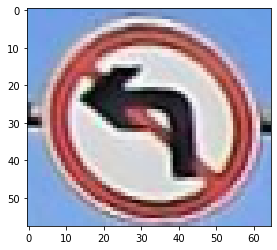

In [150]:
import random
plt.imshow(test_images[random.randint(0,69)])
plt.show()


1/1 [==============================] - 0s 23ms/step


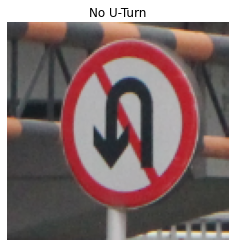

1/1 [==============================] - 0s 18ms/step


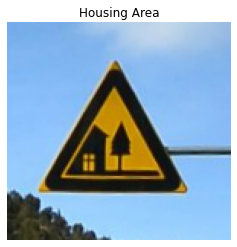

1/1 [==============================] - 0s 20ms/step


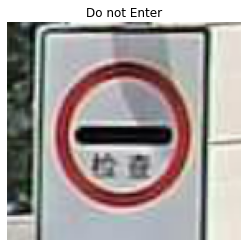

1/1 [==============================] - 0s 19ms/step


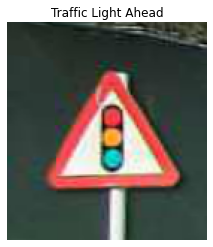

1/1 [==============================] - 0s 18ms/step


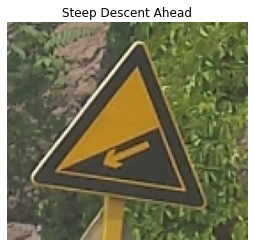

1/1 [==============================] - 0s 19ms/step


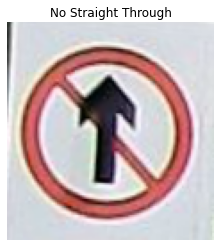

1/1 [==============================] - 0s 19ms/step


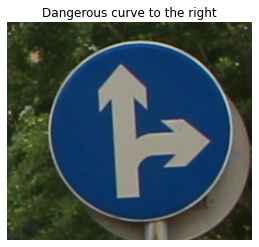

1/1 [==============================] - 0s 17ms/step


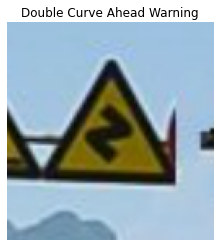

1/1 [==============================] - 0s 18ms/step


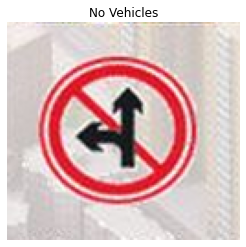

1/1 [==============================] - 0s 21ms/step


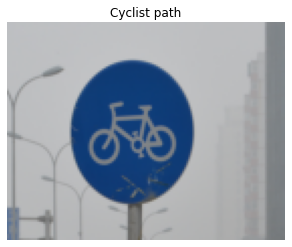

1/1 [==============================] - 0s 19ms/step


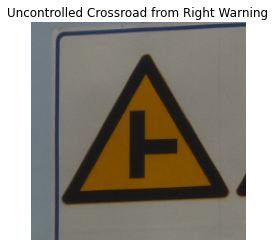

1/1 [==============================] - 0s 17ms/step


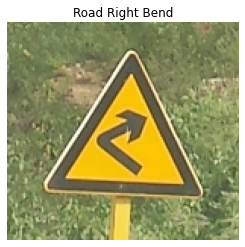

1/1 [==============================] - 0s 18ms/step
Not Sure


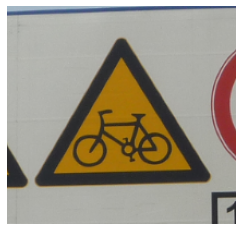

1/1 [==============================] - 0s 25ms/step


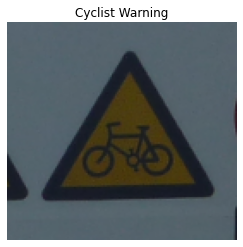

1/1 [==============================] - 0s 19ms/step


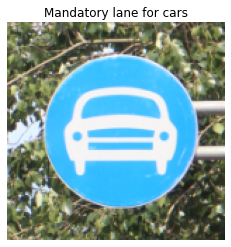

1/1 [==============================] - 0s 18ms/step


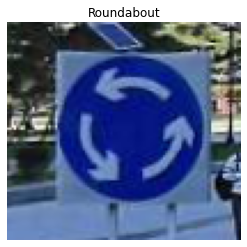

1/1 [==============================] - 0s 17ms/step


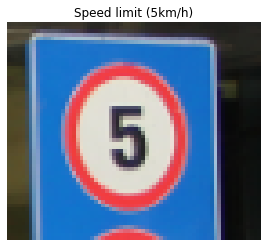

1/1 [==============================] - 0s 18ms/step


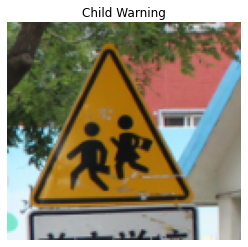

1/1 [==============================] - 0s 18ms/step


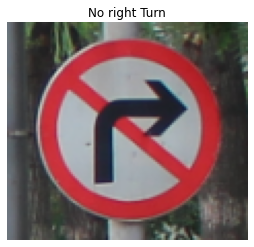

1/1 [==============================] - 0s 18ms/step


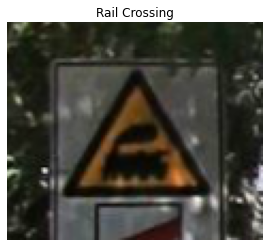

1/1 [==============================] - 0s 17ms/step


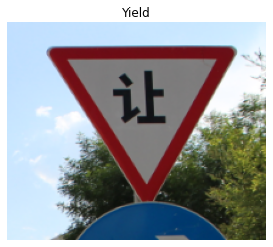

1/1 [==============================] - 0s 18ms/step


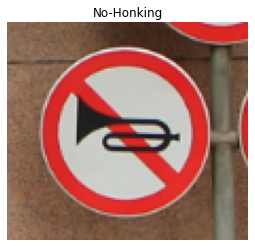

1/1 [==============================] - 0s 18ms/step


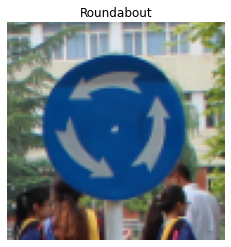

1/1 [==============================] - 0s 18ms/step


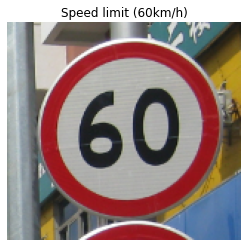

1/1 [==============================] - 0s 20ms/step


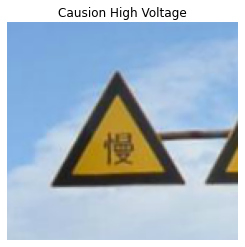

1/1 [==============================] - 0s 18ms/step


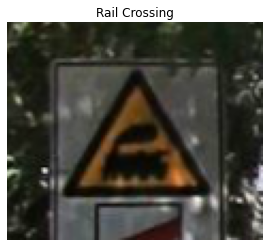

1/1 [==============================] - 0s 18ms/step


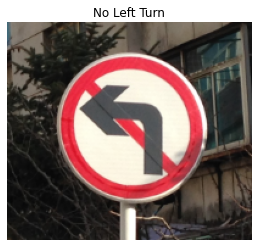

1/1 [==============================] - 0s 19ms/step


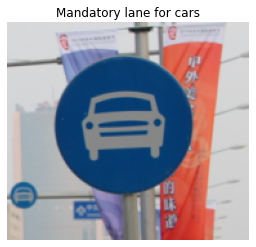

1/1 [==============================] - 0s 18ms/step


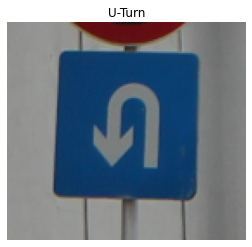

1/1 [==============================] - 0s 18ms/step


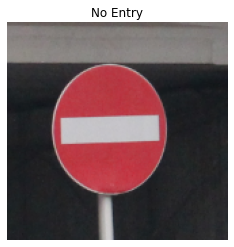

1/1 [==============================] - 0s 19ms/step


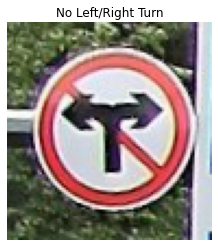

1/1 [==============================] - 0s 20ms/step


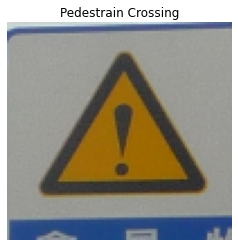

1/1 [==============================] - 0s 18ms/step


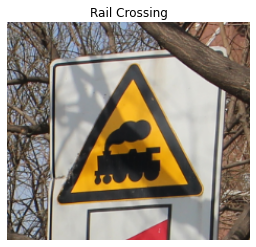

1/1 [==============================] - 0s 20ms/step


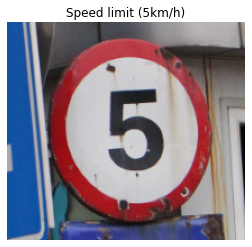

1/1 [==============================] - 0s 18ms/step


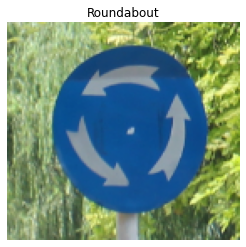

1/1 [==============================] - 0s 18ms/step


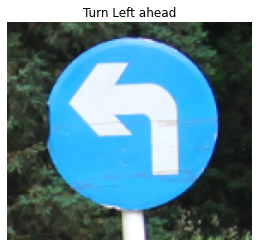

1/1 [==============================] - 0s 19ms/step


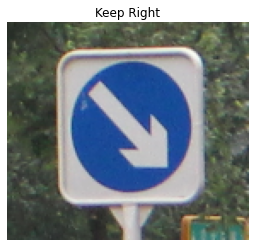

1/1 [==============================] - 0s 18ms/step


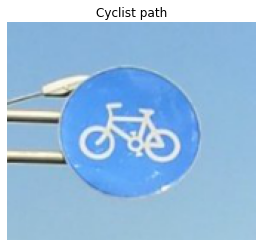

1/1 [==============================] - 0s 19ms/step


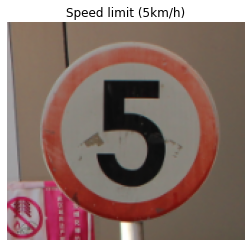

1/1 [==============================] - 0s 19ms/step


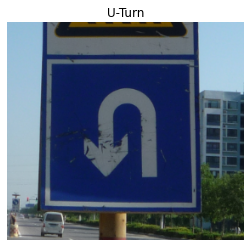

1/1 [==============================] - 0s 17ms/step


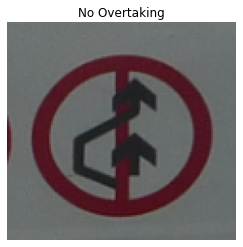

1/1 [==============================] - 0s 19ms/step


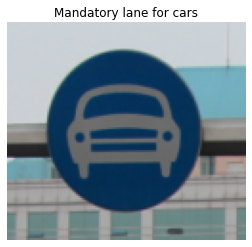

1/1 [==============================] - 0s 19ms/step


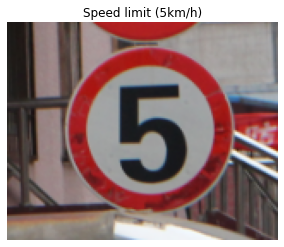

1/1 [==============================] - 0s 18ms/step


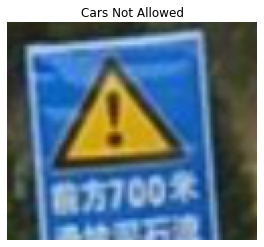

1/1 [==============================] - 0s 18ms/step


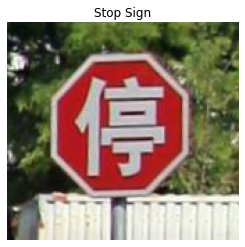

1/1 [==============================] - 0s 18ms/step


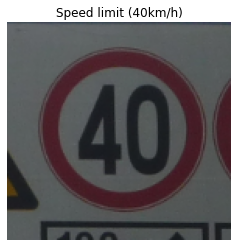

1/1 [==============================] - 0s 18ms/step


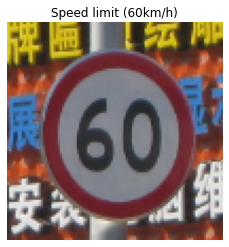

1/1 [==============================] - 0s 23ms/step


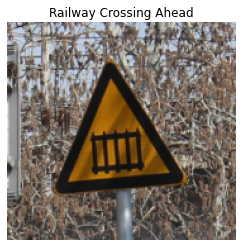

1/1 [==============================] - 0s 18ms/step
Not Sure


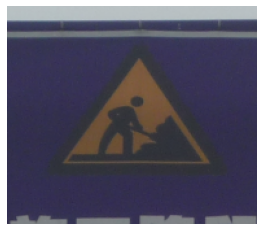

1/1 [==============================] - 0s 19ms/step


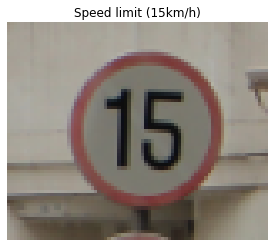

1/1 [==============================] - 0s 18ms/step


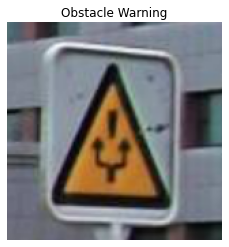

1/1 [==============================] - 0s 19ms/step


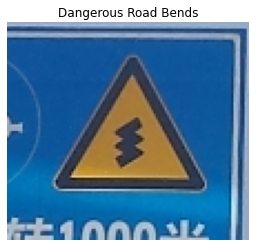

1/1 [==============================] - 0s 18ms/step


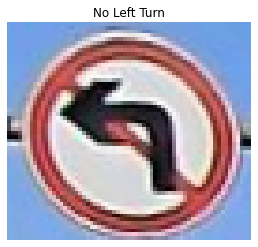

1/1 [==============================] - 0s 19ms/step


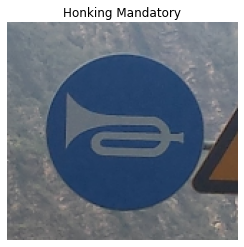

1/1 [==============================] - 0s 18ms/step


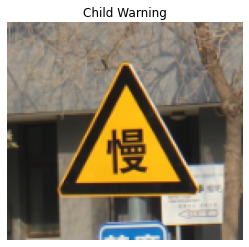

1/1 [==============================] - 0s 17ms/step


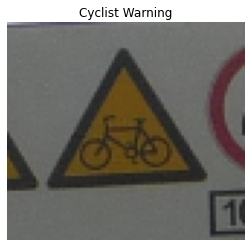

1/1 [==============================] - 0s 18ms/step


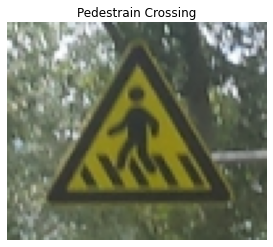

1/1 [==============================] - 0s 17ms/step


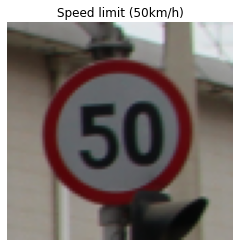

1/1 [==============================] - 0s 18ms/step


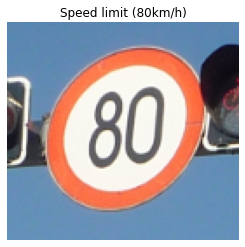

1/1 [==============================] - 0s 24ms/step


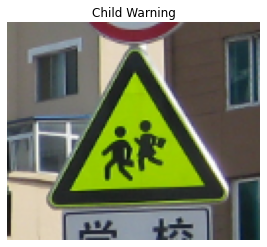

1/1 [==============================] - 0s 25ms/step


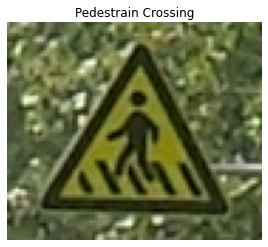

1/1 [==============================] - 0s 18ms/step


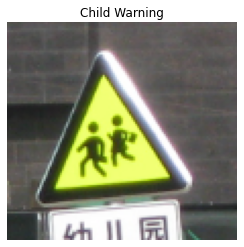

1/1 [==============================] - 0s 21ms/step


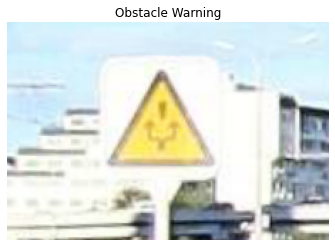

1/1 [==============================] - 0s 22ms/step


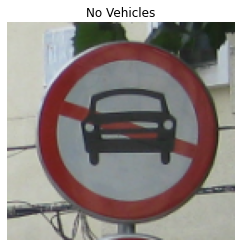

1/1 [==============================] - 0s 73ms/step


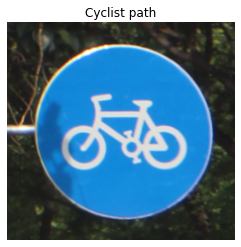

1/1 [==============================] - 0s 46ms/step


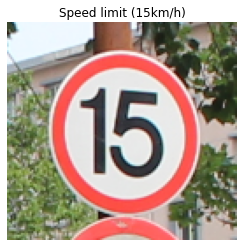

1/1 [==============================] - 0s 33ms/step


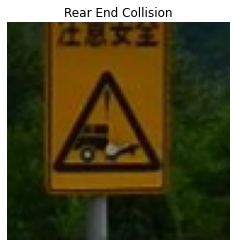

1/1 [==============================] - 0s 19ms/step


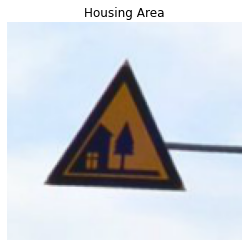

1/1 [==============================] - 0s 88ms/step


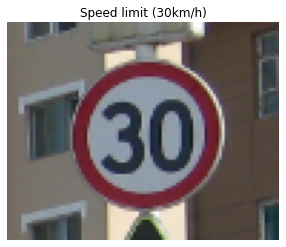

In [151]:
from cgi import test
import numpy as np
import cv2
import pickle
 
threshold = 0.75         # PROBABLITY THRESHOLD

def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

def getCalssName(classNo):
    if   classNo == 0: return 'Speed limit (5km/h)'
    elif classNo == 1: return 'Speed limit (15km/h)'
    elif classNo == 2: return 'Speed limit (30km/h)'
    elif classNo == 3: return 'Speed limit (40km/h)'
    elif classNo == 4: return 'Speed limit (50km/h)'
    elif classNo == 5: return 'Speed limit (60km/h)'
    elif classNo == 6: return 'Speed limit (70km/h)'
    elif classNo == 7: return 'Speed limit (80km/h)'
    elif classNo == 8: return 'No Straight Through/Left '
    elif classNo == 9: return 'No Straight Through/Right'
    elif classNo == 10: return 'No Straight Through'
    elif classNo == 11: return 'No Left Turn'
    elif classNo == 12: return 'No Left/Right Turn'
    elif classNo == 13: return 'No right Turn'
    elif classNo == 14: return 'No Overtaking'
    elif classNo == 15: return 'No U-Turn'
    elif classNo == 16: return 'No Vehicles'
    elif classNo == 17: return 'No-Honking'
    elif classNo == 18: return 'Speed limit (40km/h)'
    elif classNo == 19: return 'Speed limit (50km/h)'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'One Way '
    elif classNo == 22: return 'Turn Left ahead'
    elif classNo == 23: return 'Turn Left/Right'
    elif classNo == 24: return 'Turn right ahead'
    elif classNo == 25: return 'Keep Left'
    elif classNo == 26: return 'Keep Right'
    elif classNo == 27: return 'Roundabout'
    elif classNo == 28: return 'Mandatory lane for cars'
    elif classNo == 29: return 'Honking Mandatory'
    elif classNo == 30: return 'Cyclist path'
    elif classNo == 31: return 'U-Turn'
    elif classNo == 32: return 'Obstacle Warning'
    elif classNo == 33: return 'Traffic Light Ahead'
    elif classNo == 34: return 'Cars Not Allowed'
    elif classNo == 35: return 'Pedestrain Crossing'
    elif classNo == 36: return 'Cyclist Warning'
    elif classNo == 37: return 'Child Warning'
    elif classNo == 38: return 'Road Right Bend'
    elif classNo == 39: return 'Road Left Bend'
    elif classNo == 40: return 'Steep Descent Ahead'
    elif classNo == 41: return 'Steep Ascent  Ahead'
    elif classNo == 42: return 'Causion High Voltage'
    elif classNo == 43: return 'Uncontrolled Crossroad from Right Warning'
    elif classNo == 44: return 'Uncontrolled Crossroad from Left Warning'
    elif classNo == 45: return 'Housing Area'
    elif classNo == 46: return 'Double Curve Ahead Warning'
    elif classNo == 47: return 'Rail Crossing'
    elif classNo == 48: return 'Road Works Ahead'
    elif classNo == 49: return 'Dangerous Road Bends'
    elif classNo == 50: return 'Railway Crossing Ahead'
    elif classNo == 51: return 'Rear End Collision'
    elif classNo == 52: return 'Stop Sign'
    elif classNo == 53: return 'No Vehicles Entry'
    elif classNo == 54: return 'No parking'
    elif classNo == 55: return 'No Entry'
    elif classNo == 56: return 'Yield'
    elif classNo == 57: return 'Do not Enter'

count = 1
for i in range(0,69):
# PROCESS IMAGE
    img = np.asarray(test_images[i])
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    img = img.reshape(1, 32, 32, 1)
    # cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

    # PREDICT IMAGE
    predictions = model.predict(img)
    # arg max
    classIndex = np.argmax(predictions,axis=1)

    probabilityValue =np.amax(predictions)
    
    if probabilityValue > threshold:
        # plt.subplot(5,20,count)
        plt.imshow(test_images[i])
        plt.axis('off')
        plt.title(getCalssName(classIndex))
        plt.show()
        
    
    else:
        print("Not Sure")
        # plt.subplot(5,20,count)
        plt.imshow(test_images[i])
        plt.axis('off')
        plt.show()
        
    count += 1
